<a href="https://colab.research.google.com/github/mohan-mj/Random-Forest-Classification/blob/master/Hand%20written%20digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Load data

In [2]:
# The digits dataset
digits = datasets.load_digits()

## Labels

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Data description

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## How does the data data point looks like

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Visualize the digit

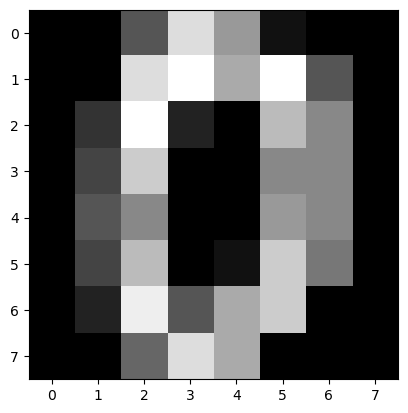

In [6]:
plt.gray() 
plt.imshow(digits.images[0])
plt.show()

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
digits.target[:]

array([0, 1, 2, ..., 8, 9, 8])

The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 4 images, stored in the `images` attribute of the dataset.  If we were working from image files, we could load them using matplotlib.pyplot.imread.  Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

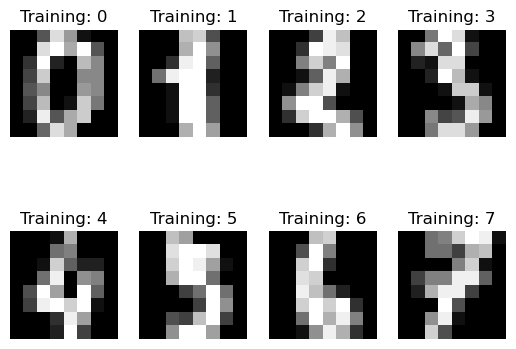

In [9]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Training: %i' % label)

    To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

In [10]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## Build Model

In [11]:
# Create a classifier: a random forest classifier
classifier = RandomForestClassifier(n_estimators=30, criterion='entropy')

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [12]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

### Model Accuracy

In [13]:
classifier.score(data[n_samples // 2:], expected)

0.9221357063403782

### Confusion matrix

In [14]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 84  0  0  0  1  0  0  0  6]
 [ 0  0 79  6  0  0  0  0  0  1]
 [ 0  0  0 76  0  2  0  3 10  0]
 [ 1  1  0  0 81  0  0  0  0  9]
 [ 0  0  0  0  0 83  4  0  0  4]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  3  1  2  0  5  0  1 76  0]
 [ 0  0  0  4  0  2  0  0  2 84]]


### Predict

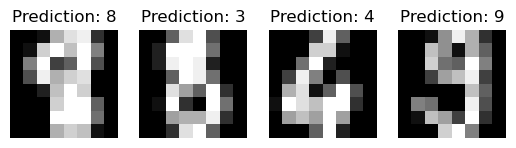

In [15]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image)
    plt.title('Prediction: %i' % prediction)

plt.show()

## Assignments

1. Save one image from test data as .jpg
2. Save 10 random images from test data as .jpg into a folder - 'test_data'

3. Read the images from 'test_data' folder
4. Predict the digit for all images

5. Create datapoint(image with digit) using paint any such SW and save to 'test_data'
6. Read this image and predict

7. Create images with multiple digits 
8. Predict all digits in this image